# Week 5 Lecture Notebook

## R in a Jupyter Notebook

We can run `R` in a Jupyter Notebook using an `R` kernel. Jupyter Notebooks support multiple programming languages, and `R` is one of them. If you look in the upper right corner of this window you'll see an `R`. 

### What is a Jupyter Notebook

A Jupyter Notebook is a digital document where you can write and execute code, visualize results, and include explanatory text. It allows you to combine programming code, equations, visualizations, and narrative text in a single interactive environment. Think of it as a versatile tool for interactive computing and data analysis, commonly used in programming and data science.

### The Kernel

In the context of a Jupyter Notebook, a kernel is a computational engine that executes the code contained in a notebook document. It is responsible for running the code written in the notebook cells and producing the output. Each notebook is associated with a specific kernel.

## The Basics

This webpage is called a Jupyter notebook. A notebook is a place to write programs and view their results. We can also to write and format text using markdown.

As for working in notebooks, there are two types of cells (each rectangle containing text or code is called a **cell**): 

 - **code** cells that hold executable code.
 
 - **markdown** cells that hold a special kind of text that follows the markdown syntax. To get familiar with the markdown syntax, take a look at this [Markdown Gudie](https://www.markdownguide.org/basic-syntax/). Markdown cells are sometime referred to as *text* cells. In the text cell below enter your name, section, and the date. Markdown cells (like this one) can be edited by double-clicking on them. After you edit a markdown cell, click the "Run cell" button at the top that looks like ▶| or hold down `Shift` + `Return` to confirm any changes. 

## Visualizing Data

The `ggplot2` package is a popular data visualization package in the R programming language. Developed by Hadley Wickham, it is based on the principles of the Grammar of Graphics. `ggplot2` provides a high-level interface for creating complex and customized plots with a simple syntax. It allows users to build graphics layer by layer, making it easy to add different components like points, lines, and facets. The package is widely used for creating aesthetically pleasing and informative data visualizations in various fields, especially in data analysis and statistics.

- `ggplot2`  Package

- `ggplot()` Function we will use for plotting

  - Data Frame

  - Aesthetics `aes()` 

  - Layers `geom_()`
  
  - Coordinate System 
  
  - Other Options

#### Aesthetic (Something Visual)

- A mapping between a visual and a variable

  - position (i.e. $x$ and $y$ axes)

  - color (outside)

  - fill (inside)

  - shape (of markers)

  - line type

  - size
  
  
Let's load the `dplyr` and `ggplot2` packages.

In [5]:
library('dplyr')
library('ggplot2')

# Set the size and dpi parameters for all the plots
# Do not change or delete the following line of code
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res=100)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




We will work with data from the `titanic` dataset. 

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

The datasheet can be accessed **[here](https://docs.google.com/document/d/1AqcjrZVqNKRbMNIbfl6iWMm8LjiBmILKIUkt20LONtw/edit?usp=sharing)**.

| **Variable**| **Definition**                         | **Key**                                        |
|:------------|:---------------------------------------|:-----------------------------------------------| 
| PassengerId | A unique identifier for each passenger |                                                |
| Survived    | Survival                               | 0 = No, 1 = Yes                                |
| Pclass      | Ticket class                           | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Name        | Name of the passenger                  |                                                |
| Sex         | Sex                                    |                                                |
| Age         | Age in years                           |                                                |
| Sibsp       | # of siblings/spouses aboard           |                                                |
| Parch       | # of parents/children aboard           |                                                |
| Ticket      | Ticket number                          |                                                |
| Fare        | Passenger fare                         |                                                |
| Cabin       | Cabin number                           |                                                |
| Embarked    | Port of Embarkation                    | C = Cherbourg, Q = Queenstown, S = Southampton |

Run the cell below to load the dataset and display the first 5 rows of the dataframe.

In [1]:
titanic <- read.csv('...')
head(titanic, 5)

Warning message in file(file, "rt"):
“cannot open file 'data/titanic.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


Now let's look at the structure of the dataframe.

In [ ]:
str(titanic)

Let's make a plot object.

In [ ]:
ggplot(data=titanic, aes(x=Embarked))

In [ ]:
g <- ggplot(data=titanic, aes(x=Embarked))
str(g)

#### Geometric Objects

- The actual marks that are put on a plot

  - points (`geom_point`, for scatter plots, dot plots, etc.)
  
  - lines (`geom_line`, for time series, trend lines, etc.)
  
  - boxplot (`geom_boxplot`)
  
  - etc.

#### Bar Charts

A bar chart is a visual representation of categorical data that uses rectangular bars or columns to represent different categories. The length or height of each bar corresponds to the frequency or count of the data in that category. Bar charts are used for displaying and comparing the values of different categories.

In [ ]:
g <- ggplot(data=titanic, aes(x=Embarked))
...

We can add addtional layers.

In [ ]:
g + geom_bar() + 
  labs(x="City", y="Count", title="Titanic Passengers City Embarked") +
  scale_x_discrete(labels=c("NA", "Cherbourg", "Queenstown", "Southampton"))

### Factors

- R data objects used to categorize data and store it using levels

- Can be strings and integers

- Useful in columns that have a limited number of unique values

- `as.factor()` function

In [ ]:
as.factor(...)

#### Stacked Bar Chart

A filled two way plot using the survival status as a factor.

In [ ]:
g + geom_bar(aes(...))

In [ ]:
g + geom_bar(aes(fill = as.factor(Survived))) + 
  labs(x="City", y="Count", title="Titanic Passengers City Embarked") +     
  scale_x_discrete(labels=c("NA", "Cherbourg", "Queenstown", "Southampton")) +
  scale_fill_discrete(name="Survival Status", labels=c("Yes", "No"))

#### Side by Side Bar Chart

In [ ]:
tbl <- titanic %>% 
       na.omit(Embarked) %>% 
       group_by(Embarked, Survived) %>%  
       summarize(Count=n( ))
tbl

**Note:** This message 

<div style="background-color: #FFC0CB; padding: 10px;">
`summarise()` has grouped output by 'Embarked'. You can override using the `.groups` argument.
</div>

is a notification from the dplyr package in R, specifically from the `summarise()` function. It indicates that your data has been grouped by the 'Embarked' variable, and any summary statistics or calculations performed with summarise() will be applied within each group.

In [ ]:
g <- ggplot(data=tbl, aes(x=Embarked, y=Count, fill=as.factor(Survived)))

In [ ]:
g + geom_bar(stat="...", position="...")

#### Histograms

A histogram is a graphical representation of the distribution of a dataset. It displays the frequency distribution of a continuous variable, dividing the data into intervals (bins) and showing how many observations fall into each bin. The horizontal axis represents the variable, while the vertical axis represents the frequency or count.

In [ ]:
g <- ggplot(data=titanic, aes(x=Age))
g + geom_histogram()

**Note:** This message 

<div style="background-color: #FFC0CB; padding: 10px;">
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:    
“Removed 177 rows containing non-finite values (`stat_bin()`).”
</div>

indicates that the stat_bin() function, used to create the histogram, has removed 177 rows from the dataset because they contain non-finite values (such as NA or NaN). Additionally, it suggests that you might want to pick a better value for binwidth.

Adding additinal layers.

In [ ]:
g  + geom_histogram(color="black", fill="red", linewidth=0.5, binwidth=5)

In [ ]:
g  + geom_histogram(color="black", fill="red", linewidth=0.5, binwidth=10)

In [ ]:
g  + geom_histogram(color="black", fill="red", linewidth=0.5, binwidth=15)

#### Scatter Plots

A scatter plot is a type of data visualization that displays individual data points on a two-dimensional graph. Each point represents the values of two variables, and the position of the point on the graph corresponds to the values of those variables.

Scatter plots help visualize the relationship between two numerical variables. By examining the pattern formed by the points, you can infer whether there is a positive, negative, or no correlation between the variables.

We will use the `mtcars` dataset to demonstrate the use of scatter plots.

`mtcars` {datasets}

**Motor Trend Car Road Tests**

**Description**
The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

| **Variable**| **Definition**                         | **Key**                                        |
|:------------|:---------------------------------------|:-----------------------------------------------|
|mpg|Miles/(US) gallon||
|cyl|Number of cylinders||
|disp|Displacement (cu. in.)||
|hp|Gross horsepower
|drat|Rear axle ratio||
|wt|Weight (1000 lbs)||
|qsec|1/4 mile time||
|vs|Engine| (0 = V-shaped, 1 = straight)|
|am|Transmission|(0 = automatic, 1 = manual)|
|gear|Number of forward gears||
|carb|Number of carburetors||

The datasheet can be found **[here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html)**.

In [6]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


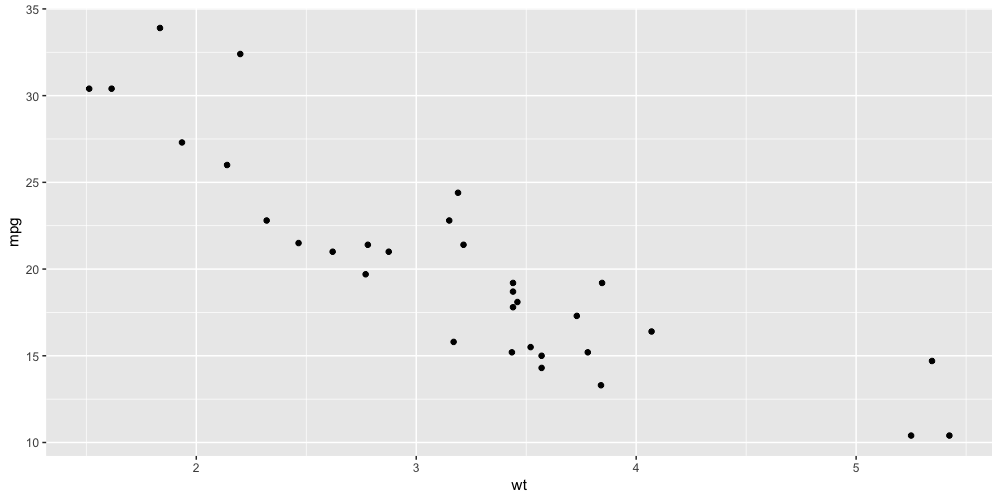

In [7]:
g <- ggplot(data=mtcars, aes(x=wt, y = mpg))
g + geom_point()

Add `cyl` as a factor.

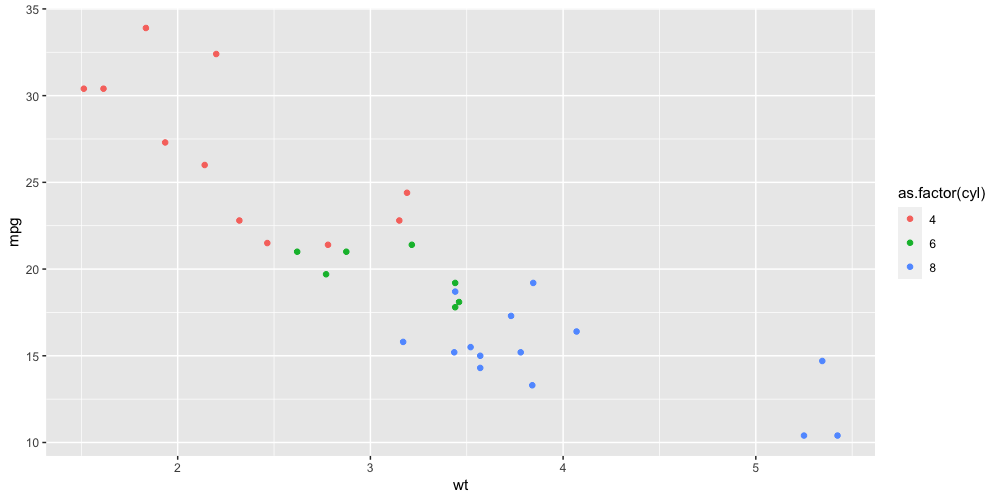

In [11]:
g <- ggplot(mtcars, aes(x=wt, y=mpg))
g + geom_point(aes(...=...(...)))

Adding a trendline.

In [ ]:
g + geom_point() + stat_smooth(method="lm")

In [ ]:
g + geom_point() + stat_smooth(method="lm", se=FALSE)

#### Box Plots

We will continue to use the `mtcars` dataset to demonstrate the use of box plots.

A box plot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a dataset. It displays key statistical measures such as the median, quartiles, and potential outliers. 

Box plots provide a concise summary of the distribution of data, emphasizing the central tendency (median) and spread (IQR). In addtion, box plots are effective for comparing the distributions of different groups or categories within a dataset. They help identify differences in medians, spreads, and the presence of outliers.

The box plot below shows a nice summary of all this information:

![Box Plot](images/boxplot.png)

In [ ]:
g <- ggplot(data=mtcars, aes(x=as.factor(cyl), y=mpg))
g + geom_boxplot()

In [ ]:
g <- ggplot(data=mtcars, aes(x=factor(cyl), y=mpg))
g + geom_boxplot() + coord_flip() + 
    labs(title="Horizontal Boxplot Example", x="Cylinders", y="mpg")

#### Line Charts

A line chart is a type of chart that displays data points called "markers" connected by straight line segments. It is commonly used to visualize trends and patterns over a continuous interval or time series. 

We will use the `flights` dataset to demonstrate the use of line charts.

| **Variable**| **Definition**                         |
|:------------|:---------------------------------------|
|year|Year|
|month|Month|
|passengers|The number of passengers during the year/month|


In [ ]:
flights <- read.csv('data/flights.csv')
tail(flights, 10)

In [ ]:
g <- ggplot(data=flights, aes(x=year, y=passengers)) 
g + geom_line()

What happened?

In [ ]:
df <- flights %>%
      ... %>%
      ...

head(df, 10)

In [ ]:
g <- ggplot(data=df, aes(x=year, y=Total)) 
g + geom_line()

## Visualizations

For this part of the lecture you will construct visualiations from the `skyscrapers.csv` dataset which comes from The Collection of Really Great, Interesting, Situated Datasets Project (CORGIS) <img src="https://corgis-edu.github.io/corgis/images/logo.png" width="35"/> by Austin Cory Bart, Ryan Whitcomb, Jason Riddle, Omar Saleem, Dr. Eli Tilevich, Dr. Clifford A. Shaffer, Dr. Dennis Kafura.

Accoriding to the site, *"The* `skyscrapers.csv` *file contains collected statistics about the tallest buildings all over the world, including the materials used to develop them, the purpose of the buildings, and more.*

The complete dataset, accompanied by an overview and variable descriptions, is available [here](https://corgis-edu.github.io/corgis/csv/skyscrapers/). Review the **Key Descriptions** to familiarize yourself with the variable names, meanings, and types.

Run the cell below to load the dataset and look at its structure.

In [ ]:
skyscrapers <- read.csv('data/skyscrapers.csv')
str(skyscrapers)

# Extra Credit

**Question 1.** Construct a bar chart using one of the categorical variables.

In [ ]:
# YOUR CODE GOES HERE REPLACING THIS COMMENT


**Question 2.** Construct a histogram using one of the numerical variables.

In [ ]:
# YOUR CODE GOES HERE REPLACING THIS COMMENT


**Question 3.** Construct a box plot using one of the categorical variables and one of the numerical variables.

In [ ]:
# YOUR CODE GOES HERE REPLACING THIS COMMENT


**Question 4.** Construct a scatter plot using two of the numerical variables.

In [ ]:
# YOUR CODE GOES HERE REPLACING THIS COMMENT


The code cell below finds the number of completed skyscapers per year and uses the results to construct a dataframe named `ss`.

In [ ]:
ss <- skyscrapers %>% 
      filter(status.current == 'completed' & status.completed.year >= 2000) %>% 
      group_by(status.completed.year) %>% 
      summarize(count=n())

head(ss, 5)

**Question 5.** Construct a line chart using the `df` dataframe. 

In [ ]:
# YOUR CODE GOES HERE REPLACING THIS COMMENT


# Submission

Make sure that all cells in your assignment have been executed to display all output, images, and graphs in the final document.

**Note:** Save the assignment before proceeding to download the file. Upon saving, locate the resulting `.ipynb` document in the file view payne on the left-hand side,  and download the `.ipynb` file by `SHIFT`-clicking on the file name and selecting **Save Link As**. Or, find the .zip file in the left side of the screen and right-click and select **Download**. You'll submit this .zip file for the assignment in Moodle to Gradescope for grading.

If you have any questions, please post them on the Moodle discussion board dedicated to this assignment.